In [1]:
import tempfile
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return im_new

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

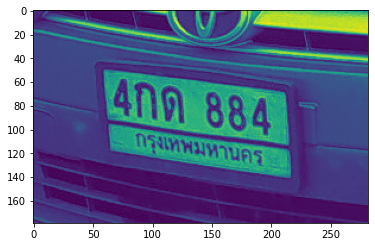

In [2]:
# path to input image is specified and 
# image is loaded with imread command
image1 = cv2.imread('4-884.jpg')
 
# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

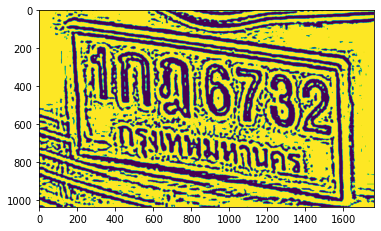

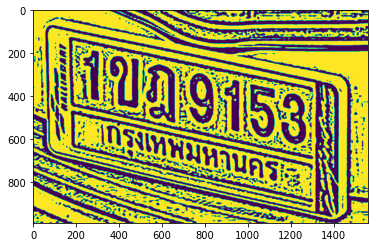

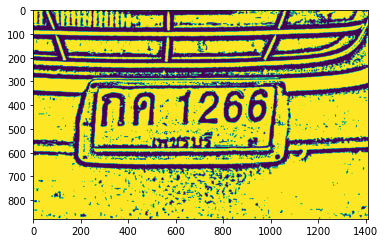

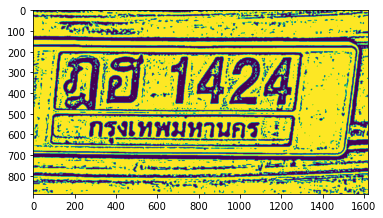

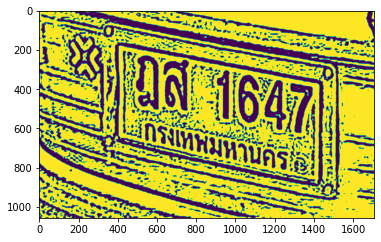

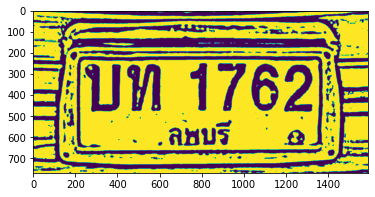

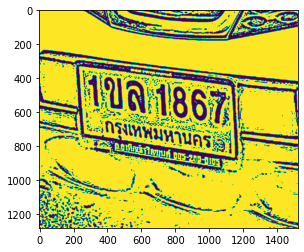

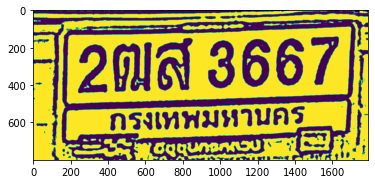

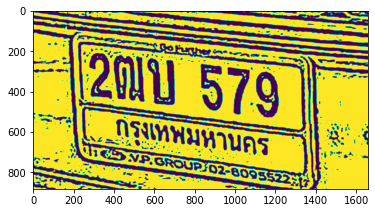

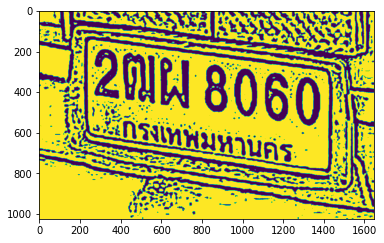

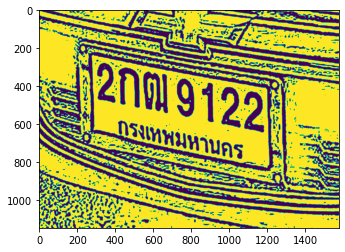

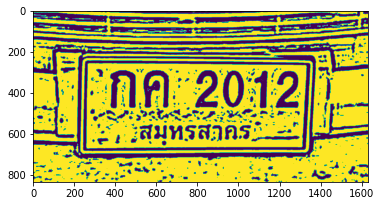

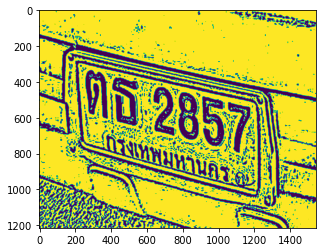

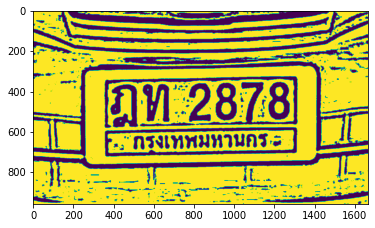

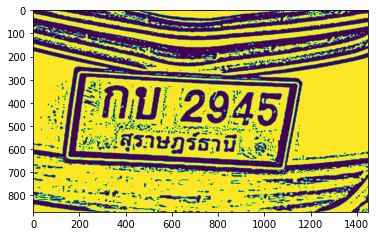

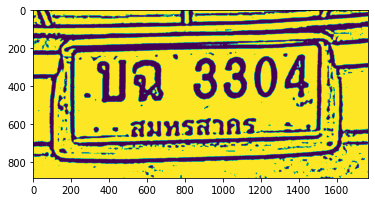

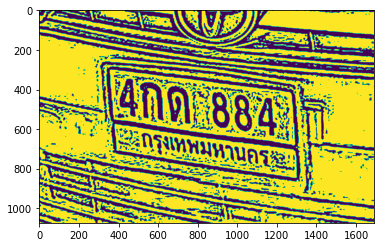

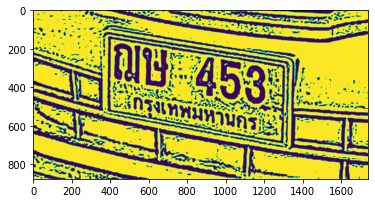

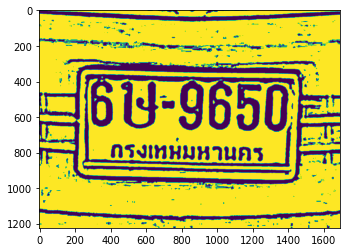

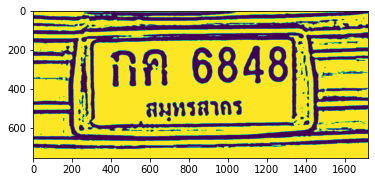

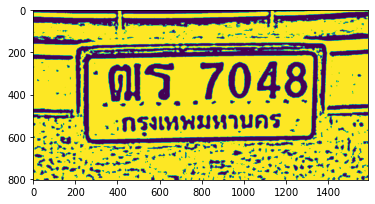

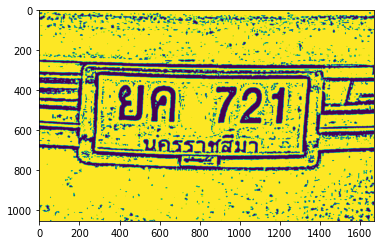

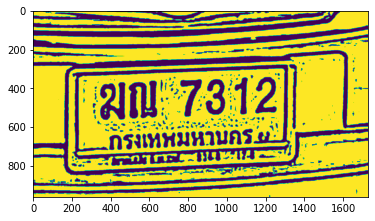

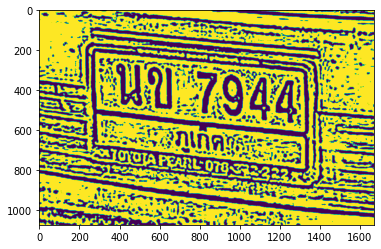

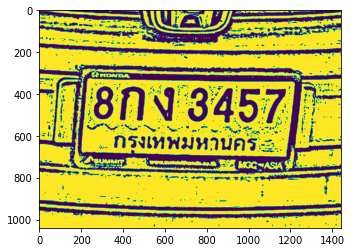

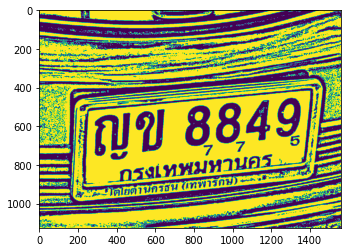

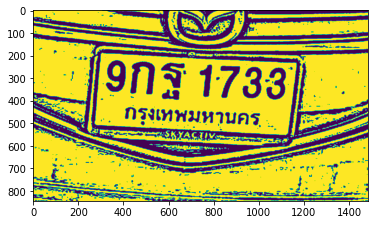

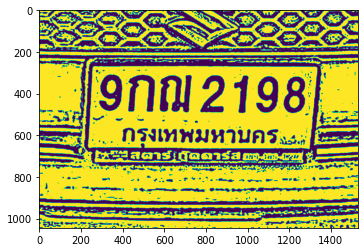

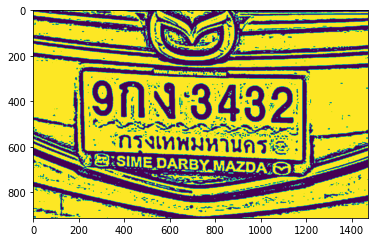

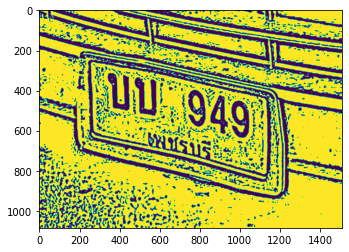

In [7]:
path = 'Train_crop/'
for file in os.listdir(path):
    a = process_image_for_ocr(path + '/' + file)
    plt.imshow(a)
    plt.show()
    cv2.imwrite('results/{}'.format(file), a) 